**What are the driving factors behind the A1c levels in T2DM Jordanian patients?**

**Bivariate**

In [1]:
#import the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("/content/df.csv")

In [3]:
df.head()

,ID,Region,Age,BMI,Gender,Marital_Status,Education,Employment,HH_Income,Rent,Loans,Smoking,Diabetes_Duration,Hypertension_category,CVD,HbA1c,Uncontrolled
0,1,WA,36,27.9,Female,Married,2,Yes,3,Yes,No,Yes,43,Normal,0,7.2,0
1,2,EA,48,30.2,Female,Married,1,No,1,Yes,No,No,97,First-Grade,1,8.9,0
2,3,EA,46,28.6,Female,Married,1,No,1,Yes,No,Yes,68,First-Grade,1,9.8,1
3,4,WZ,65,34.9,Female,Married,1,No,2,Yes,Yes,Yes,119,Second-Grade,0,9.7,1
4,5,EA,48,29.2,Female,Married,2,Yes,2,Yes,No,Yes,61,Second-Grade,1,10.4,1


In [4]:
df.describe()

,ID,Age,BMI,Education,HH_Income,Diabetes_Duration,CVD,HbA1c,Uncontrolled
count,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000
mean,606.000000,55.905863,29.148803,1.720066,2.495458,64.338563,0.344344,8.430306,0.290669
std,349.729896,8.278683,4.829084,0.666868,0.995330,36.741527,0.475350,1.380513,0.454259
min,1.000000,35.000000,18.200000,1.000000,1.000000,6.000000,0.000000,5.900000,0.000000
25%,303.500000,50.000000,25.900000,1.000000,2.000000,37.000000,0.000000,7.400000,0.000000
50%,606.000000,56.000000,28.300000,2.000000,2.000000,62.000000,0.000000,8.300000,0.000000
75%,908.500000,59.000000,31.500000,2.000000,3.000000,85.000000,1.000000,9.200000,1.000000
max,1211.000000,79.000000,55.600000,3.000000,5.000000,232.000000,1.000000,13.200000,1.000000


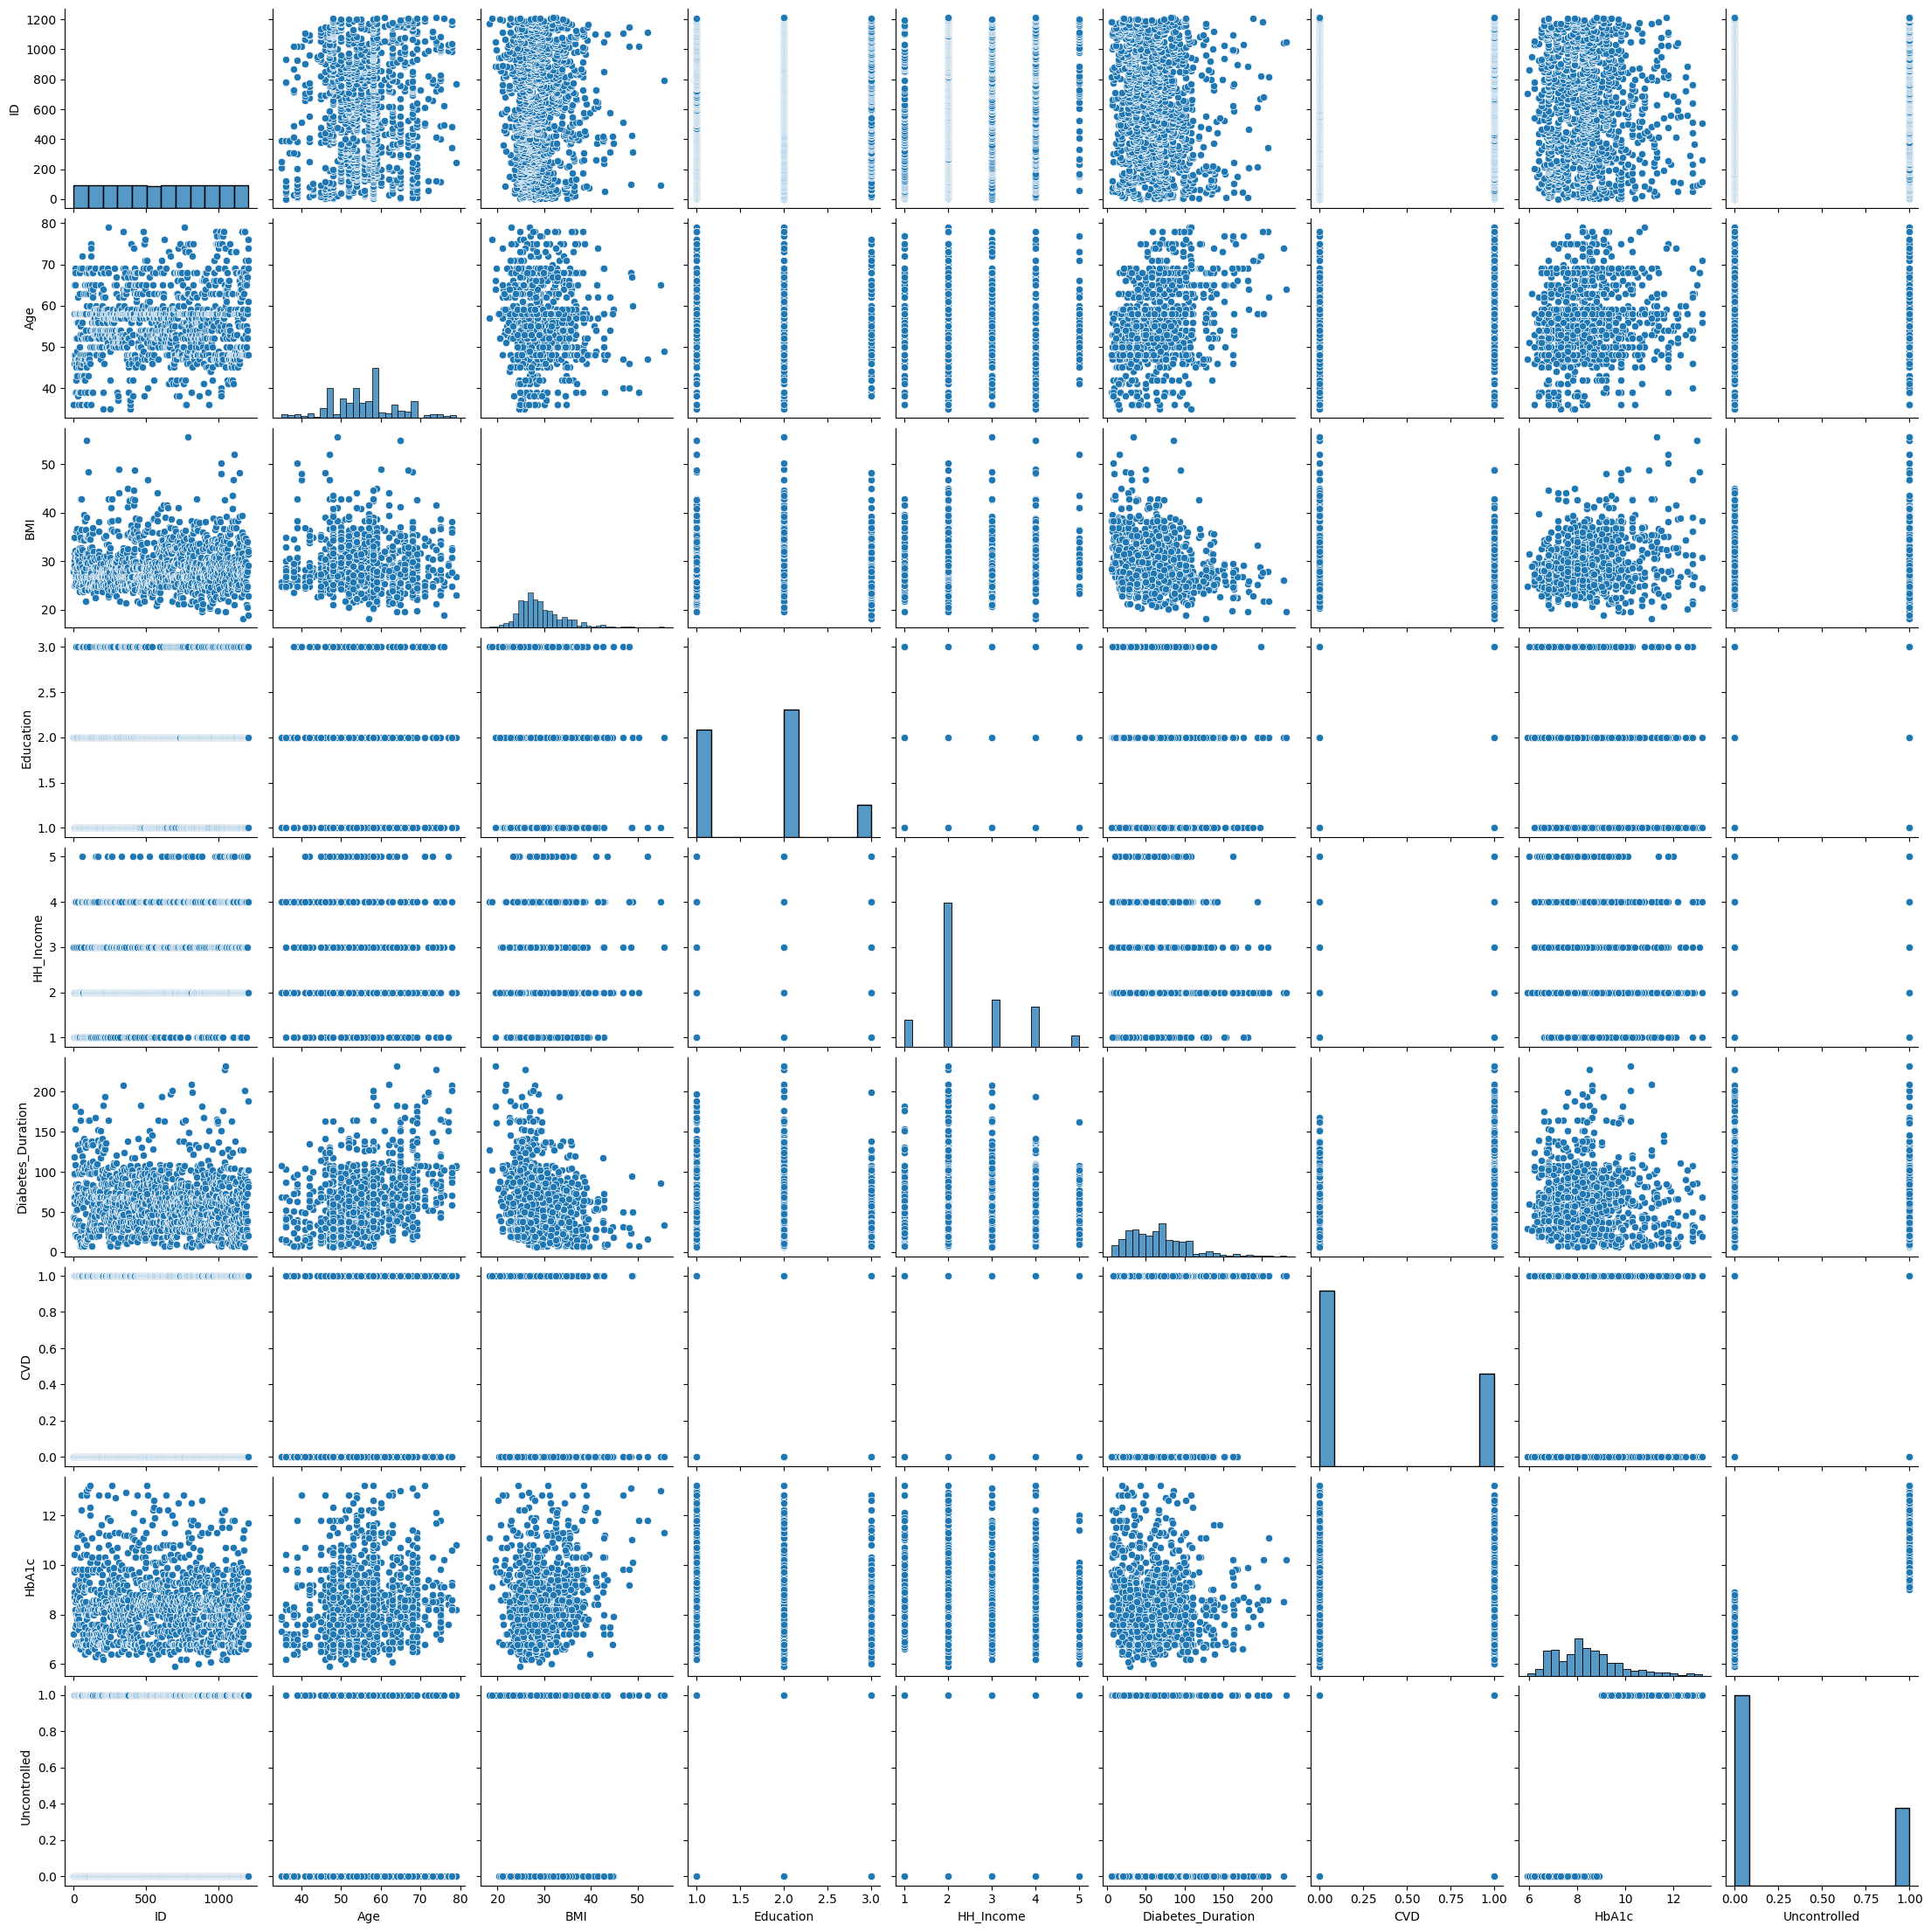

In [ ]:
#Pairplot 
sns.pairplot(data = df)
plt.show()

<ipython-input-5-62b3f02e8fd0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


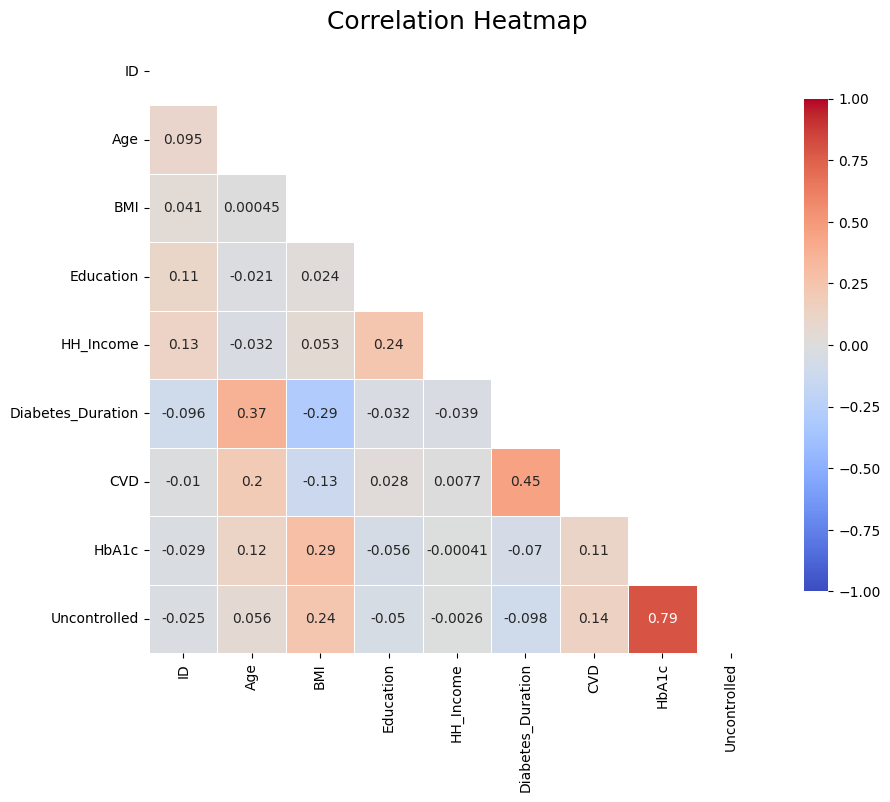

In [5]:
#correlation matrix
corr_matrix = df.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=18)
plt.show()

<ipython-input-5-08cb3133f633>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.HbA1c).set(title = 'Distribution of HbA1c', xlabel = 'HbA1c', ylabel='Frequency')


[Text(0.5, 1.0, 'Distribution of HbA1c'),
 Text(0.5, 0, 'HbA1c'),
 Text(0, 0.5, 'Frequency')]

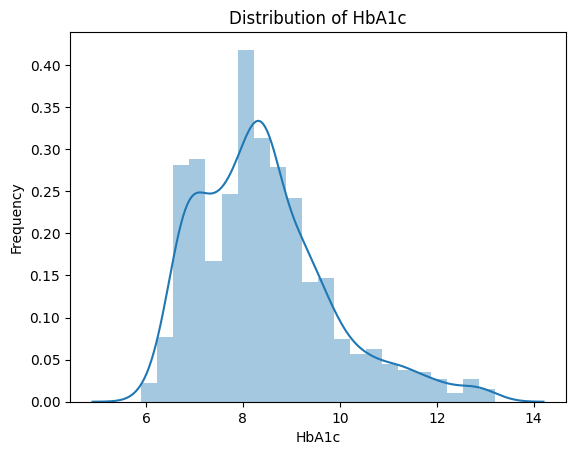

In [5]:
#distribution of the "HbA1c"
sns.distplot(df.HbA1c).set(title = 'Distribution of HbA1c', xlabel = 'HbA1c', ylabel='Frequency')
#its not normally distributed, there is a right skewnes

### Region

<Axes: xlabel='Region', ylabel='count'>

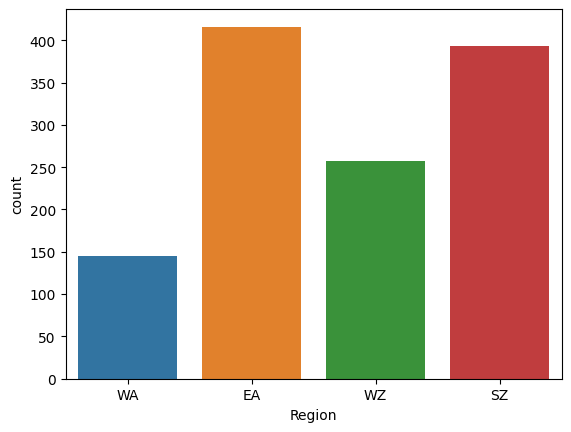

In [6]:
#Region_CountPlot
sns.countplot(x=df.Region, data=df)
#count of each "Region"

<Axes: xlabel='HbA1c', ylabel='Region'>

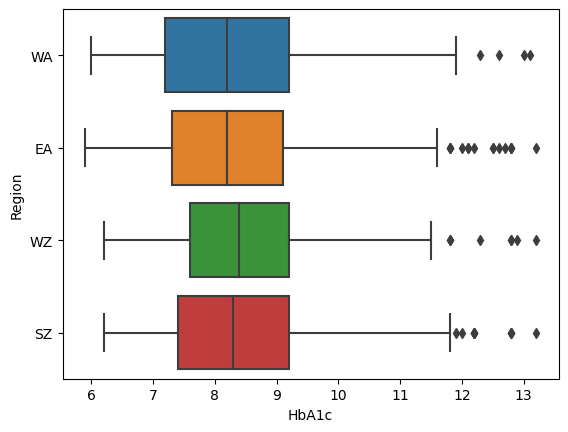

In [41]:
#Region_BoxPlot
sns.boxplot(x= df.HbA1c, y = df.Region)
#min, max, median(mean= median) almost the same, and we can say that the outliers results are the same as well depending on the percentage of the size. and the max, outliers starting approximately at the same point
#so, we see that the "Region" variable doesn't affect on the "HbA1c" and no differences on the results

### Age

<ipython-input-8-7b344b3bbe2b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age).set(title = 'Distribution of Age', xlabel = 'Age', ylabel='Frequency')


[Text(0.5, 1.0, 'Distribution of Age'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Frequency')]

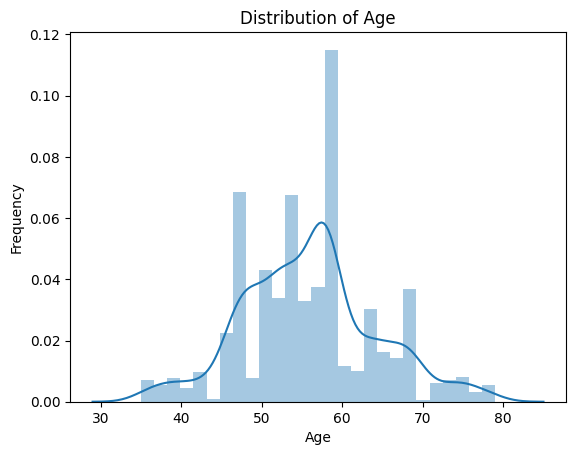

In [8]:
#distribution of the "Age"
sns.distplot(df.Age).set(title = 'Distribution of Age', xlabel = 'Age', ylabel='Frequency')

<ipython-input-9-fef1679deb64>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df.Age)).set(title = 'Distribution of Age', xlabel = 'Age', ylabel='Frequency')


[Text(0.5, 1.0, 'Distribution of Age'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Frequency')]

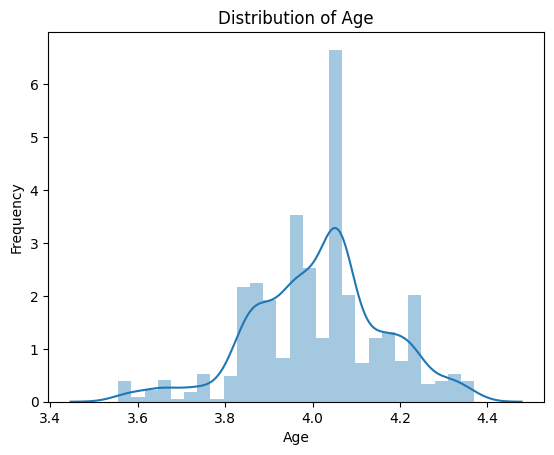

In [9]:
#distribution of the "Age" after transforming the data using logarithm
sns.distplot(np.log(df.Age)).set(title = 'Distribution of Age', xlabel = 'Age', ylabel='Frequency')
#its not normal

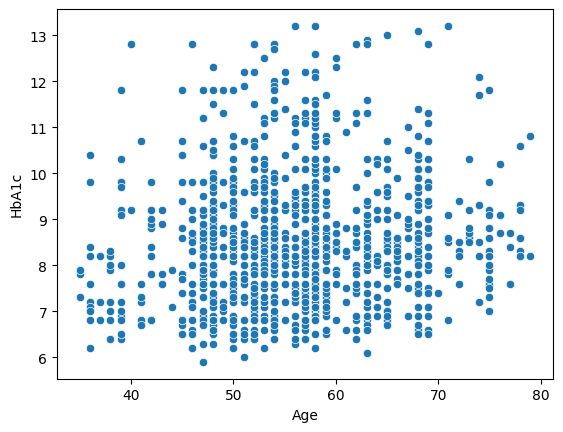

In [10]:
#ScatterPlot
sns.scatterplot(x=df.Age, y=df.HbA1c, data=df)
plt.show()
#there is no clear relationship but there is a density relationship between ages 50-60

<Axes: xlabel='Age', ylabel='HbA1c'>

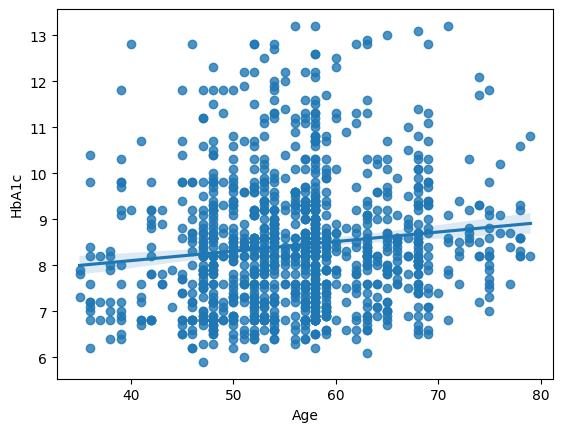

In [11]:
#Regression Plot after transforming the data using logarithm
sns.regplot(x=df.Age, y=df.HbA1c, data=df)
#there is no clear relationship but there is a density relationship between ages 50-60

### BMI

[Text(0.5, 1.0, 'Distribution of BMI'),
 Text(0.5, 0, 'BMI'),
 Text(0, 0.5, 'Frequency')]

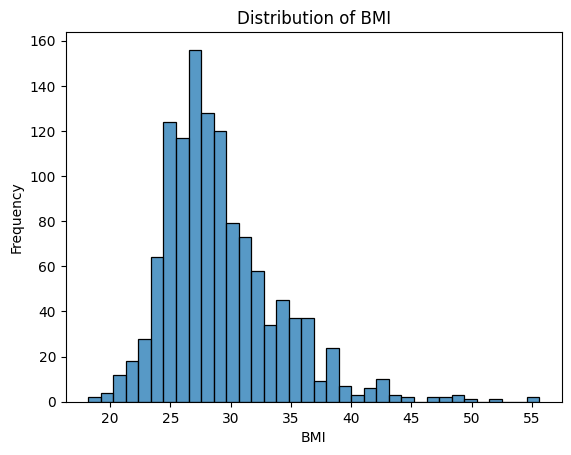

In [45]:
sns.histplot(df.BMI).set(title = 'Distribution of BMI', xlabel = 'BMI', ylabel='Frequency')

<ipython-input-12-25b3c1c84df8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.BMI).set(title = 'Distribution of BMI', xlabel = 'BMI', ylabel='Frequency')


[Text(0.5, 1.0, 'Distribution of BMI'),
 Text(0.5, 0, 'BMI'),
 Text(0, 0.5, 'Frequency')]

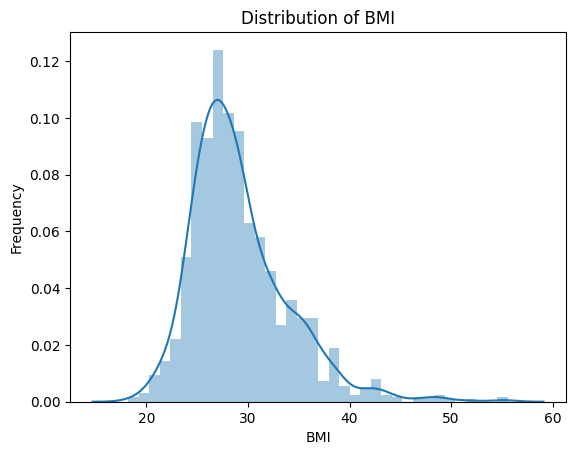

In [12]:
#distribution of the "BMI"
sns.distplot(df.BMI).set(title = 'Distribution of BMI', xlabel = 'BMI', ylabel='Frequency')
#mostly its normally distributed

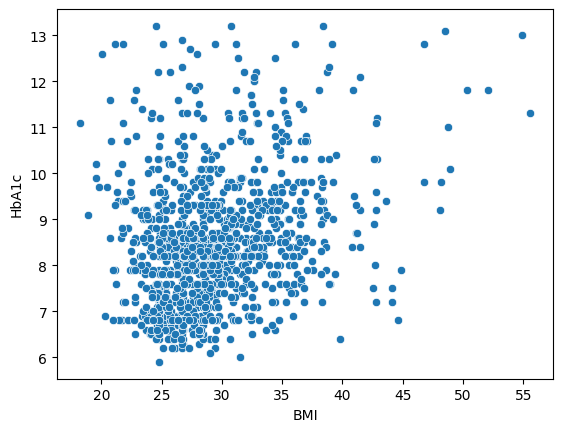

In [13]:
#ScatterPlot
sns.scatterplot(x=df.BMI, y=df.HbA1c, data=df)
plt.show()
#there is a relationship between BMI & HbA1c but not strong, the density of the HbA1c values are under (9) which means most of the patients status are under control but when the value >= 9 the status goes to be uncontrolled.

<Axes: xlabel='BMI', ylabel='HbA1c'>

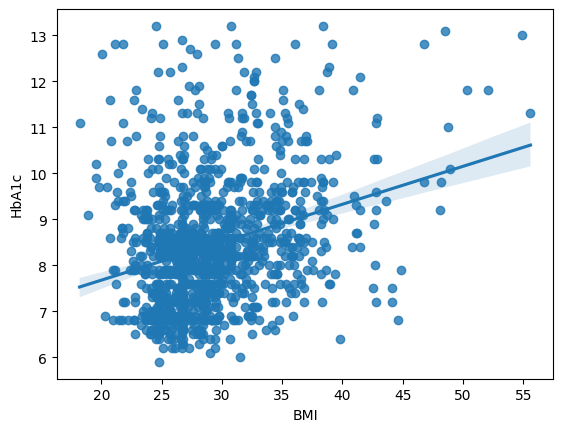

In [14]:
#Regression Plot
sns.regplot(x=df.BMI, y=df.HbA1c, data=df)
#there is a relationship between BMI & HbA1c but not strong, the density of the HbA1c values are under (9) which means most of the patients status are under control but when the value >= 9 the status goes to be uncontrolled.

### Gender

In [15]:
df.Gender.value_counts()
#the counts are close

Female    667
Male      544
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

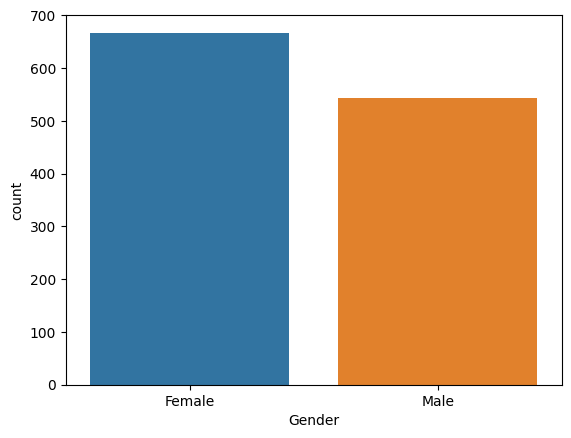

In [16]:
#Gender_CountPlot
sns.countplot(x=df.Gender, data=df)
#count of each "Gender"

<Axes: xlabel='HbA1c', ylabel='Gender'>

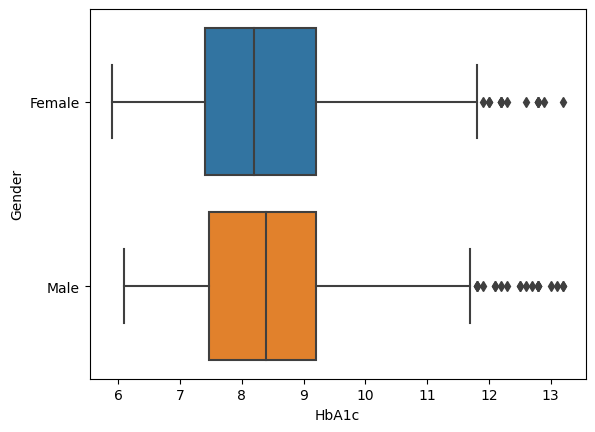

In [17]:
#Gender_BoxPlot
sns.boxplot(x= df.HbA1c, y = df.Gender)
#median (8.5) almost the same, and we can say that the outliers results are the same, range of the HbA1c [7.5-9.2]  
#so, we see that the "Gender" variable doesn't affect on the "HbA1c" and no difference on the results

### Marital_Status

In [18]:
df.Marital_Status.value_counts()

Married     963
Divorced    135
Single       61
Widowed      52
Name: Marital_Status, dtype: int64

<Axes: xlabel='Marital_Status', ylabel='count'>

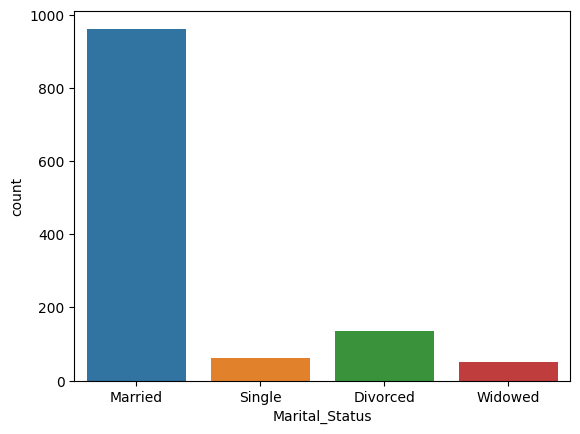

In [19]:
#Marital_Status_CountPlot
sns.countplot(x=df.Marital_Status, data=df)
#count of each "Marital_Status"

<Axes: xlabel='HbA1c', ylabel='Marital_Status'>

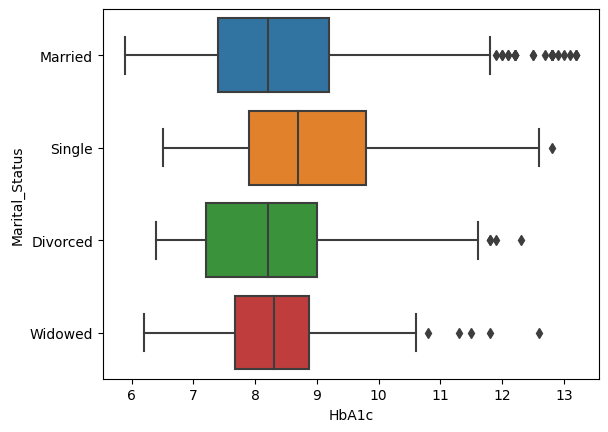

In [20]:
#Marital_Status_BoxPlot
sns.boxplot(x= df.HbA1c, y = df.Marital_Status)
#median, min, max is different between all status, and there are skeweness on all of the distributions of each.
#we can notice that the most increasing in the HbA1c in the "Married" status, min starts at 6, max at 11.5, and a bulk of uncontrolled results greater than 12
#uncontrolled values of each Marital_Status starts at: Married[11.8], Single[13], Divorced[12], Widowed[10.8]

### Education

<Axes: xlabel='Education', ylabel='count'>

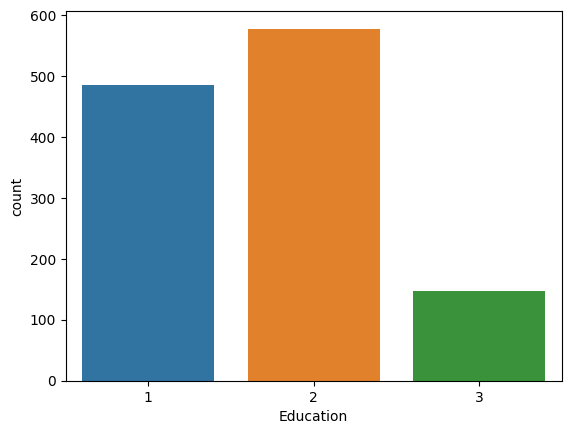

In [21]:
#Education_CountPlot
sns.countplot(x=df.Education, data=df)
#count of each "Education"

<Axes: xlabel='Education', ylabel='HbA1c'>

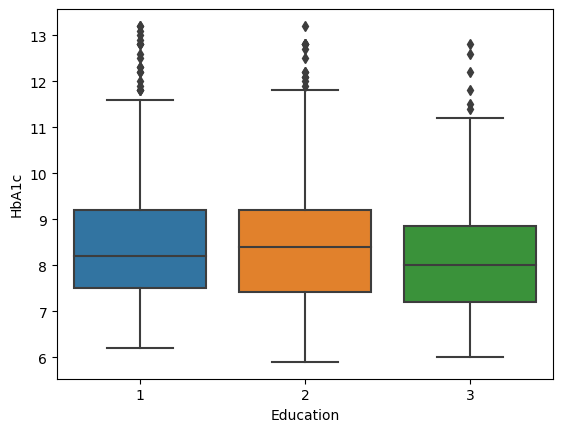

In [22]:
#Education
sns.boxplot(y= df.HbA1c, x = df.Education)
#median depends on the education level, at the first level the HbA1c was low as a median but a large bulk of patients got a value if HbA1c greater than 11.5
#and we see that when the education is higher the HbA1c decreasing especially the uncontrolled values (>= 9)
#we explain that because it depends on the mentality/awarness and life style is improved when the education is increasing
#I see there is a relationship between "Education" and "HbA1c"

### Employment

<Axes: xlabel='Employment', ylabel='count'>

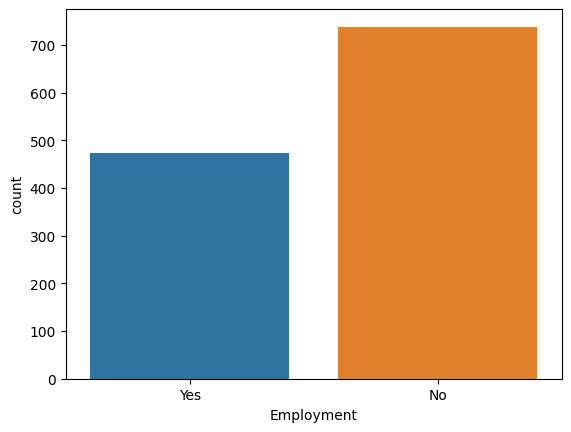

In [23]:
#Employment_CountPlot
sns.countplot(x=df.Employment, data=df)
#count of each "Employment"

<Axes: xlabel='HbA1c', ylabel='Employment'>

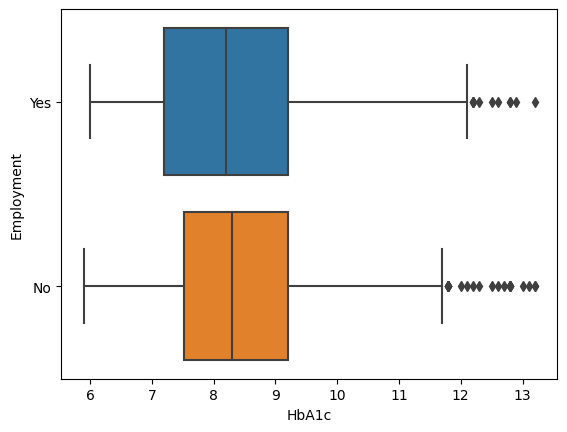

In [24]:
#BoxPlot
sns.boxplot(x= df.HbA1c, y= df.Employment)
#median almost the same
#first quartile in no-employment starts with high value of HbA1c than the employment, and also in no-employment the uncontrolled values (HbA1c >= 9) starts at (11.8) and with big bulk of patients
#this is because the no-employment patients have a different life style than the employment which increase the Hba1C in the no-employment
#I see there is a relationship between "Employment" and "HbA1c"

### HH_Income

<Axes: xlabel='HH_Income', ylabel='count'>

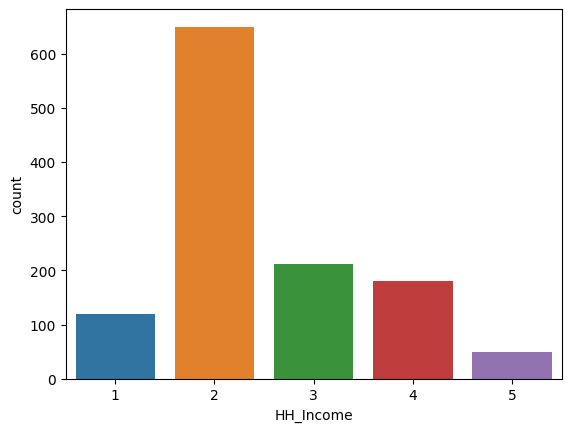

In [25]:
#HH_Income_CountPlot
sns.countplot(x=df.HH_Income, data=df)

<Axes: xlabel='HH_Income', ylabel='HbA1c'>

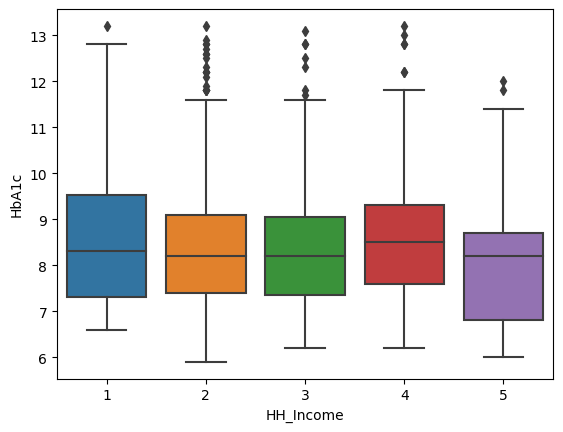

In [26]:
#BoxPlot
sns.boxplot(y= df.HbA1c, x= df.HH_Income)
#median almost the same just its differ when the HH_Income = 5, it has left skewness and the first quartile starts at 6.5
#we see the most impact of HH_Income was in level two and we expalin that because the bulk of data was too large
#no relationship

### Rent

<Axes: xlabel='Rent', ylabel='count'>

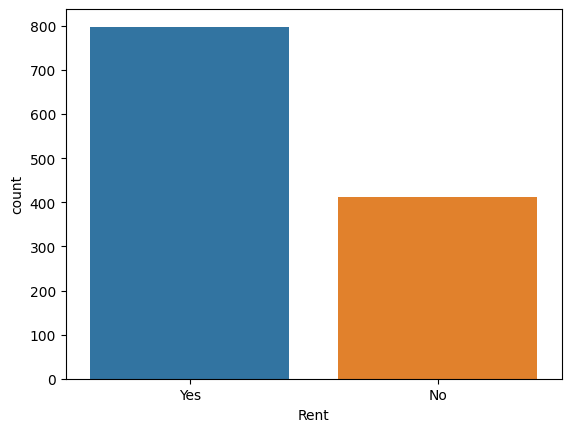

In [27]:
#CountPlot
sns.countplot(x=df.Rent, data=df)

<Axes: xlabel='HbA1c', ylabel='Rent'>

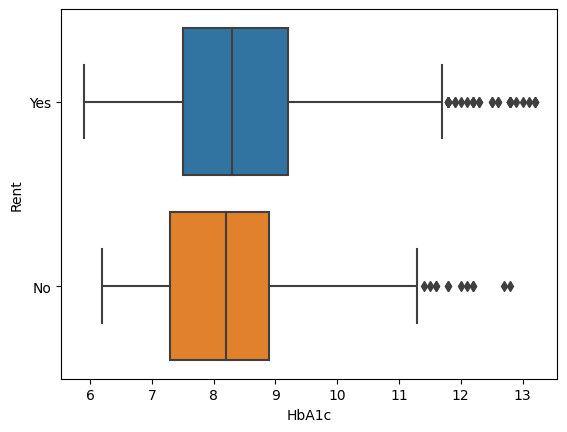

In [28]:
#Rent
sns.boxplot(x= df.HbA1c, y= df.Rent)
#median almost the same
#there is no relationship

### Loans

<Axes: xlabel='Loans', ylabel='count'>

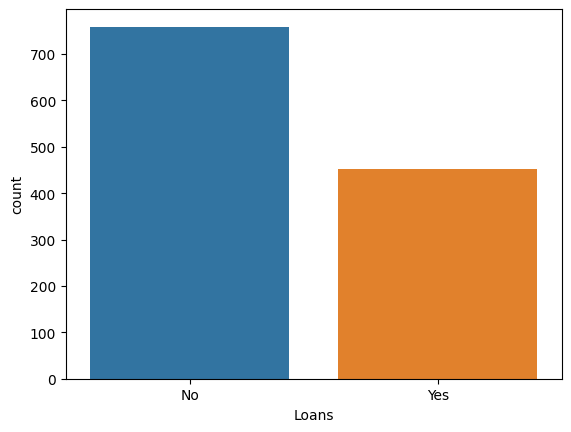

In [29]:
#CountPlot
sns.countplot(x=df.Loans, data=df)

<Axes: xlabel='HbA1c', ylabel='Loans'>

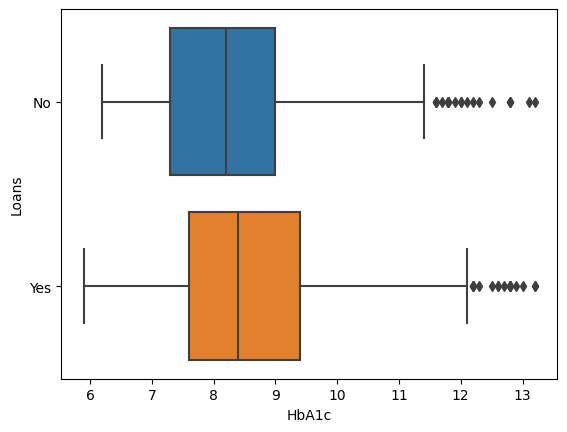

In [30]:
#Loans
sns.boxplot(x= df.HbA1c, y= df.Loans)
#median almost the same
#there is no relationship

### Smoking

<Axes: xlabel='Smoking', ylabel='count'>

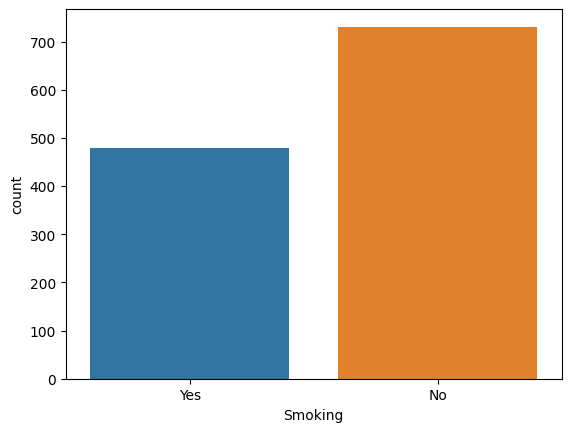

In [31]:
#CountPlot
sns.countplot(x=df.Smoking, data=df)

<Axes: xlabel='HbA1c', ylabel='Smoking'>

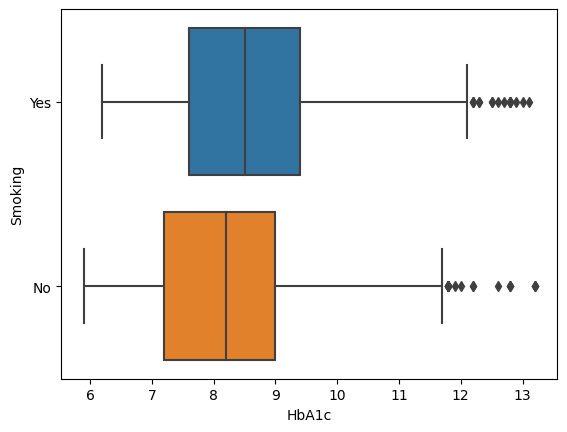

In [32]:
#Smoking
sns.boxplot(x= df.HbA1c, y= df.Smoking)
#median is different, min, max, median values of HbA1c in (Smoking) higher than the HbA1c values in non-smoking
#third quartile in Smoking status started at 9.5 of HbA1c value which means above the un-controlled
#there is a relationship

### Diabetes_Duration

<ipython-input-33-86b6005ff7f8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Diabetes_Duration).set(title = 'Distribution of Diabetes_Duration', xlabel = 'ADiabetes_Duration', ylabel='Frequency')


[Text(0.5, 1.0, 'Distribution of Diabetes_Duration'),
 Text(0.5, 0, 'ADiabetes_Duration'),
 Text(0, 0.5, 'Frequency')]

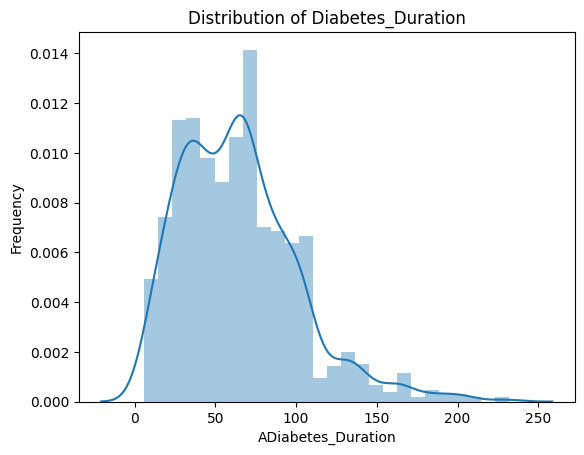

In [33]:
#distribution of the "Diabetes_Duration"
sns.distplot(df.Diabetes_Duration).set(title = 'Distribution of Diabetes_Duration', xlabel = 'ADiabetes_Duration', ylabel='Frequency')
#there is a right skewness

<ipython-input-34-d1ad82a1c16c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df.Diabetes_Duration)).set(title = 'Distribution of Diabetes_Duration', xlabel = 'ADiabetes_Duration', ylabel='Frequency')


[Text(0.5, 1.0, 'Distribution of Diabetes_Duration'),
 Text(0.5, 0, 'ADiabetes_Duration'),
 Text(0, 0.5, 'Frequency')]

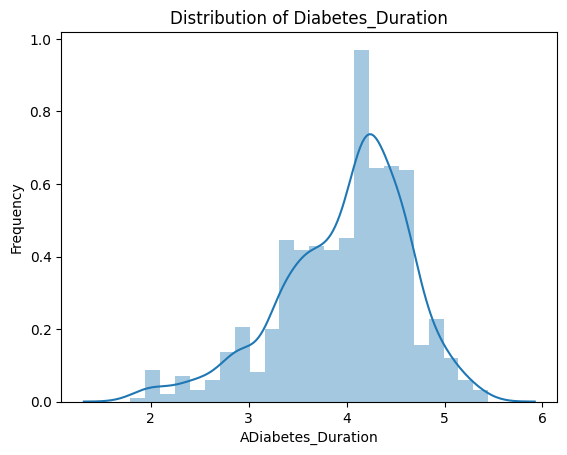

In [34]:
#distribution of the "Diabetes_Duration"
sns.distplot(np.log(df.Diabetes_Duration)).set(title = 'Distribution of Diabetes_Duration', xlabel = 'ADiabetes_Duration', ylabel='Frequency')
#its not normal

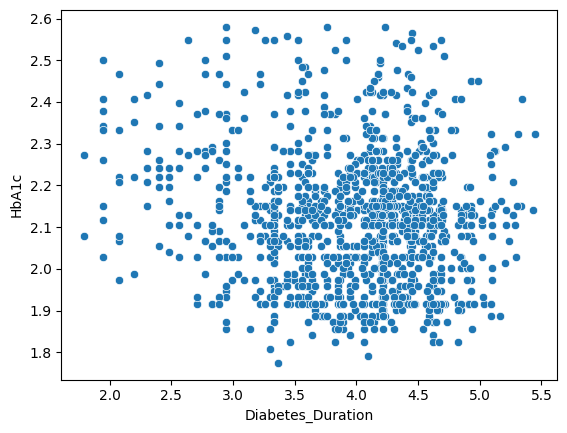

In [46]:
#ScatterPlot
sns.scatterplot(x=df.Diabetes_Duration, y=df.HbA1c, data=df)
plt.show()
#there is no relationship

<Axes: xlabel='Diabetes_Duration', ylabel='HbA1c'>

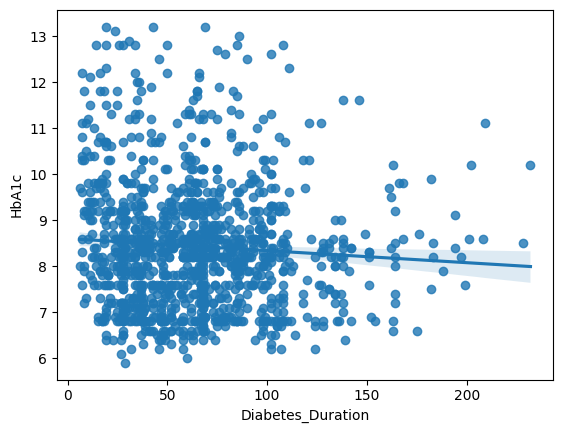

In [36]:
#Regression Plot
sns.regplot(x=df.Diabetes_Duration, y=df.HbA1c, data=df)
#there is no relationship

### Hypertension_category

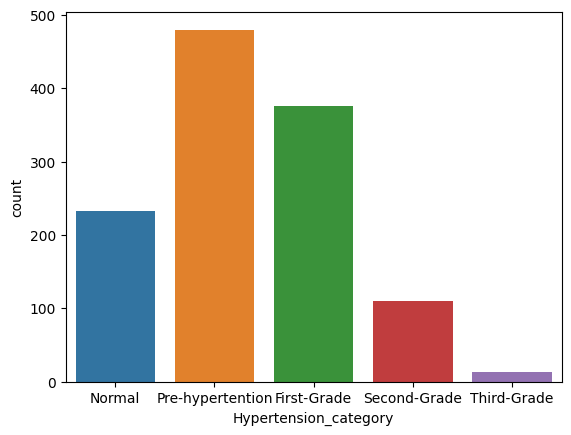

<Figure size 2000x600 with 0 Axes>

In [49]:
#CountPlot
sns.countplot(x=df.Hypertension_category, data=df, order=('Normal', 'Pre-hypertention', 'First-Grade', 'Second-Grade', 'Third-Grade') )
plt.figure(figsize=(20,6))
plt.show()

<Axes: xlabel='HbA1c', ylabel='Hypertension_category'>

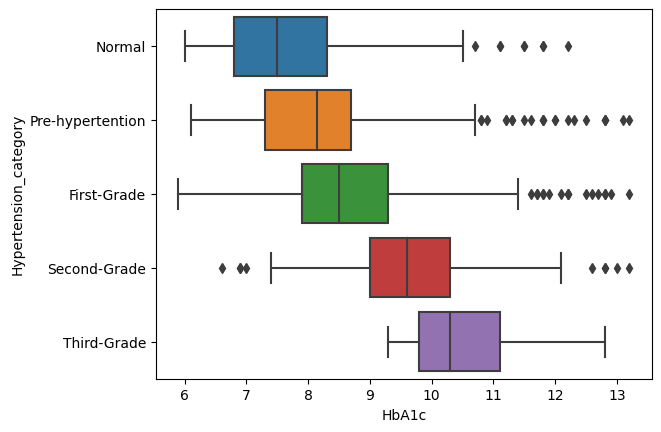

In [50]:
#Hypertension_category
sns.boxplot(x= df.HbA1c, y= df.Hypertension_category, order=('Normal', 'Pre-hypertention', 'First-Grade', 'Second-Grade', 'Third-Grade'))
#median is different for all
#there is a relationship between Hypertension and HbA1c, whenever the status of Hypertension increase the HbA1c increase

### CVD

<Axes: xlabel='CVD', ylabel='count'>

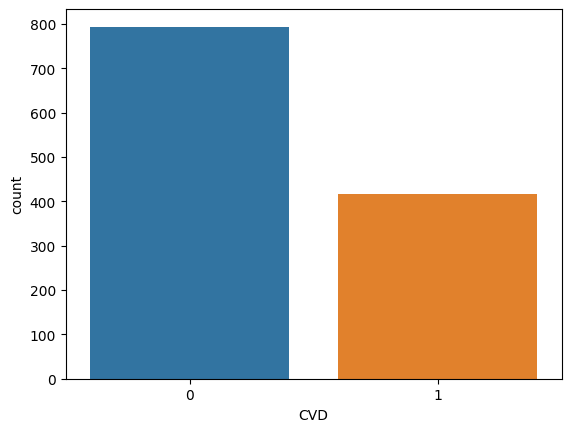

In [39]:
#CountPlot
sns.countplot(x=df.CVD, data=df, )

<Axes: xlabel='CVD', ylabel='HbA1c'>

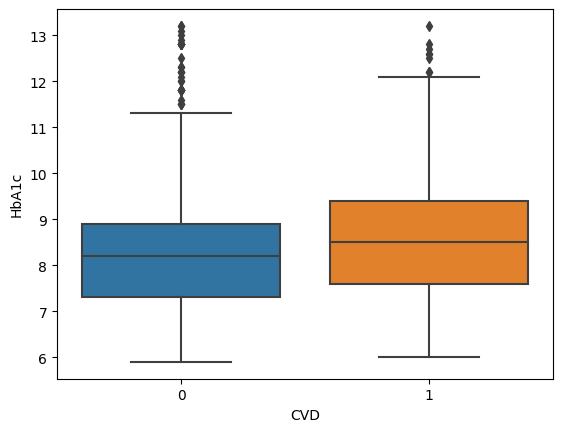

In [40]:
#CVD
sns.boxplot(y= df.HbA1c, x= df.CVD)
#min, max, median is different in both
#first and third quartiles when CVD=1 are high in comparison when CVD=0
#there is a strong relationship

### Summary Statistics

In [51]:
import statsmodels.api as sm
X = df[['Age', 'BMI', 'Diabetes_Duration']]
y = df['HbA1c']

In [52]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

In [53]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  HbA1c   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     44.62
Date:                Wed, 17 May 2023   Prob (F-statistic):           2.41e-27
Time:                        20:57:20   Log-Likelihood:                -2044.6
No. Observations:                1211   AIC:                             4097.
Df Residuals:                    1207   BIC:                             4118.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.9273      0.34

### Multivariate

<Axes: xlabel='BMI', ylabel='HbA1c'>

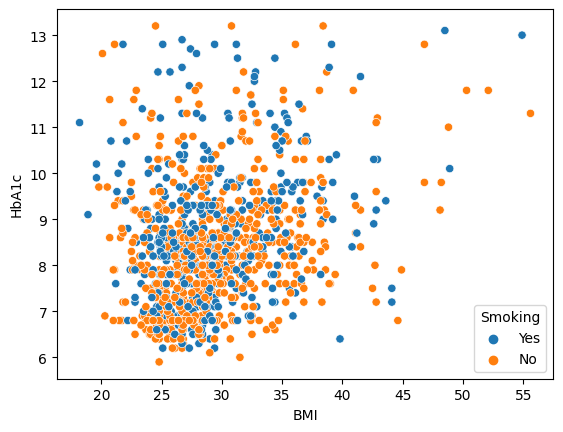

In [65]:
#BMI & HbA1c
sns.scatterplot(x=df.BMI, y=df.HbA1c, hue=df.Smoking, data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 47.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


ValueError: ignored

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


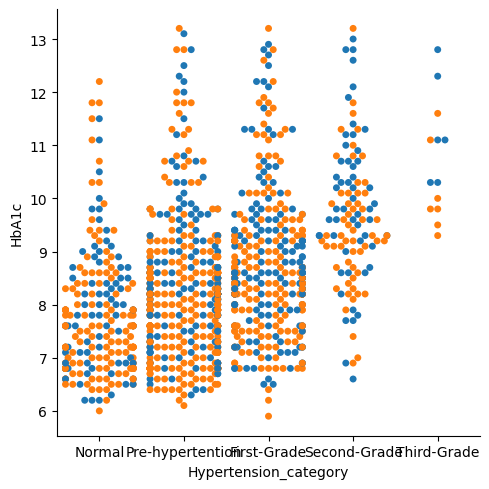

In [68]:
sns.catplot(data=df, x=df.Hypertension_category, y=df.HbA1c, kind='swarm', hue=df.Smoking, order=('Normal', 'Pre-hypertention', 'First-Grade', 'Second-Grade', 'Third-Grade'))